<a href="https://colab.research.google.com/github/DeepMalviya1/YBI-Foundation/blob/main/Thyroid_Prediction_Deep_Malviya_YBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Thyroid/ThyroidDisease.csv')

# Data Observation

In [3]:
data.head(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
data.describe(include = 'all')

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


# Checking Null Values and Unique Values

In [6]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [7]:
data.nunique()

age                           94
sex                            3
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          288
T3 measured                    2
T3                            70
TT4 measured                   2
TT4                          242
T4U measured                   2
T4U                          147
FTI measured                   2
FTI                          235
TBG measured                   1
TBG                            1
referral source                5
binaryClass                    2
dtype: int

In [8]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [9]:
# Storing all columns with high values in this variable
highval = ['age','TSH','T3','TT4','T4U','FTI']

In [10]:
data.isin(['?']).sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [11]:
# Initially replacing alien element with 0
data[highval] = data[highval].replace('?',0)
data[highval] = data[highval].astype('float')

In [12]:
data[highval].describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.722163,4.589148,1.603006,101.685790,0.892915,99.194247
std,20.099955,23.339839,1.096918,43.182478,0.354204,45.846407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.750000
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000
75%,67.000000,2.425000,2.200000,123.000000,1.070000,121.250000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [13]:
# Now replacing 0 by mean of column using for loop
for row in highval:
  avg = data[row].mean()
  data[row] = data[row].replace(0,avg)

In [14]:
# Manual method without loop

# data['age'] = data['age'].replace(0,51.722163)
# data['TSH'] = data['TSH'].replace(0,4.589148	)
# data['T3'] = data['T3'].replace(0,1.603006)
# data['TT4'] = data['TT4'].replace(0,101.685790)
# data['T4U'] = data['T4U'].replace(0,0.892915	)
# data['FTI'] = data['FTI'].replace(0,99.194247)

In [15]:
# Checking all 0's are replaced or not
data.isin([0]).sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [16]:
# Checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

# Fixing Categorical Values

In [17]:
#Creating a variable to store all columns with object datatype
cat = data.select_dtypes(include = 'object')
cat = cat.drop(['TBG','binaryClass','referral source'], axis = 1)

In [18]:
cat.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured
0,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,t,t,f
1,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,f,f,f
2,M,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,f,t,t,t,f
3,F,t,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,f,f,f
4,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,t,t,f


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


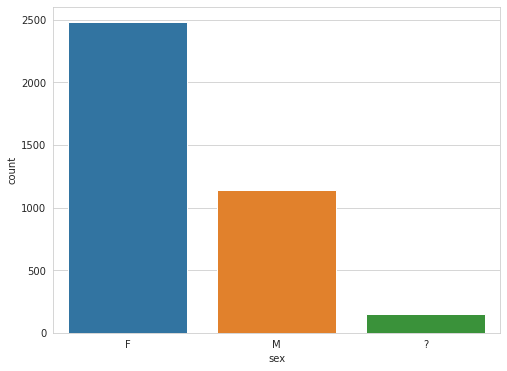

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


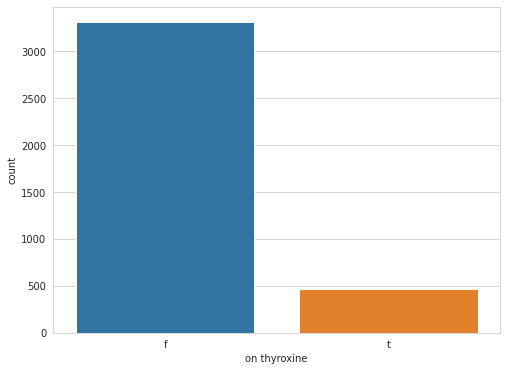

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


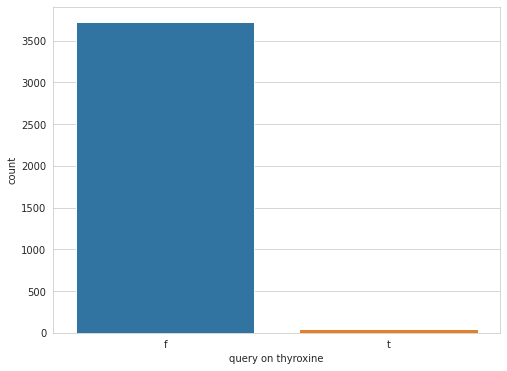

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


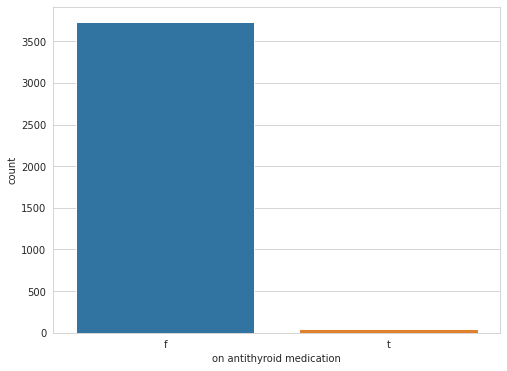

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


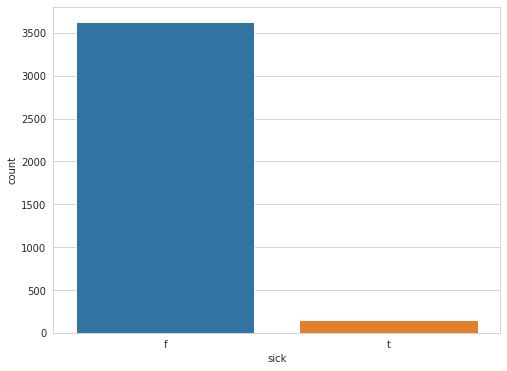

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


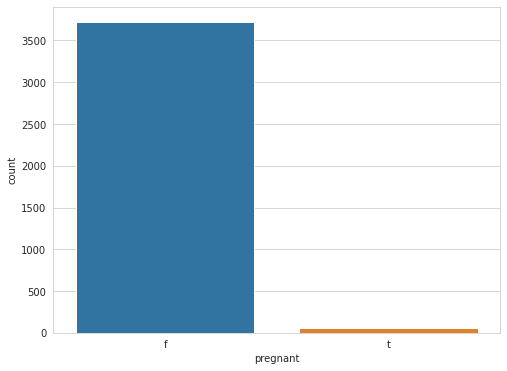

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


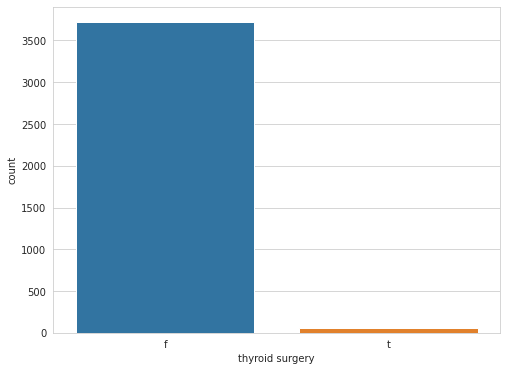

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


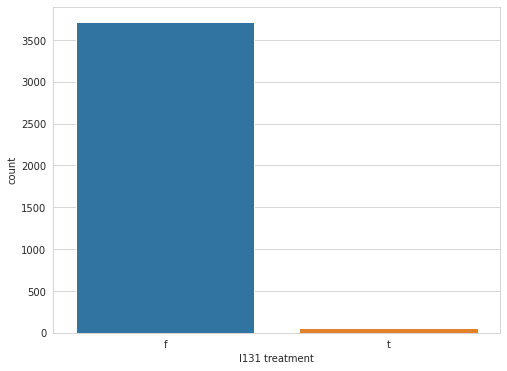

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


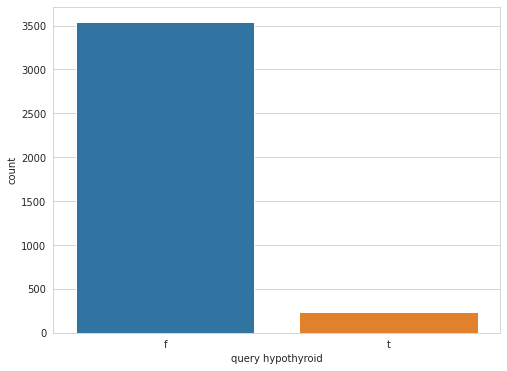

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


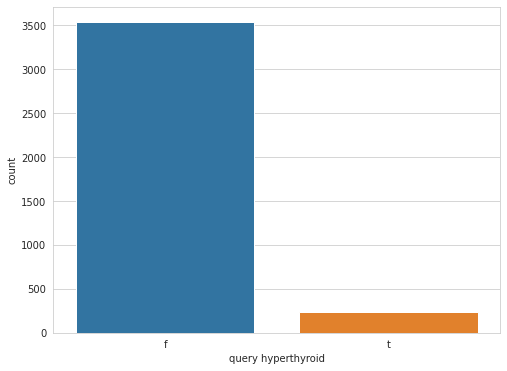

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


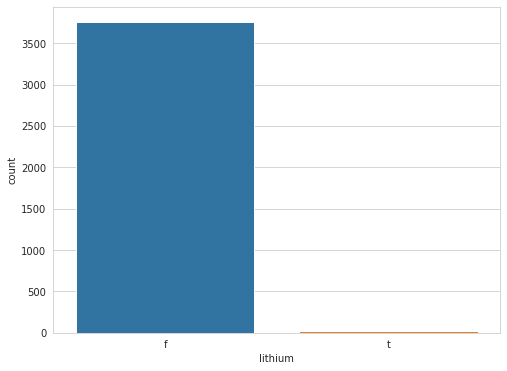

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


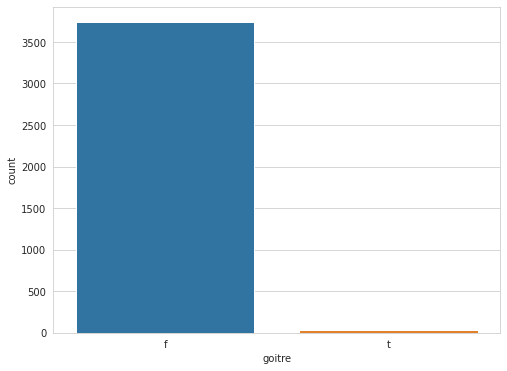

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


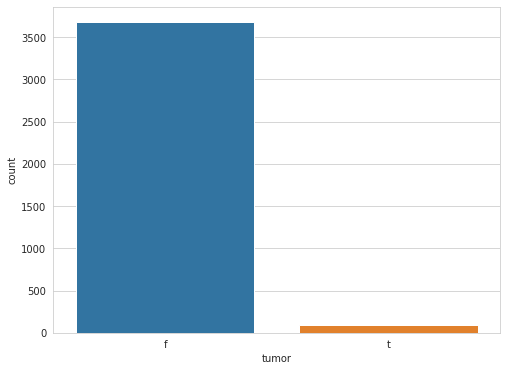

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


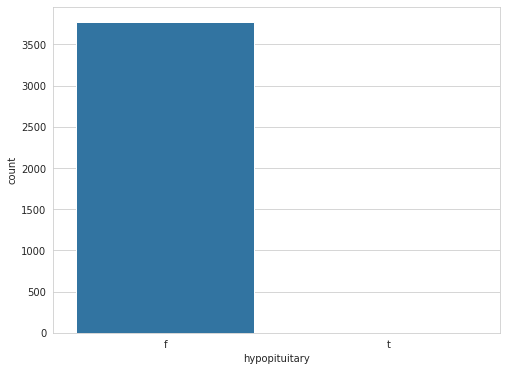

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


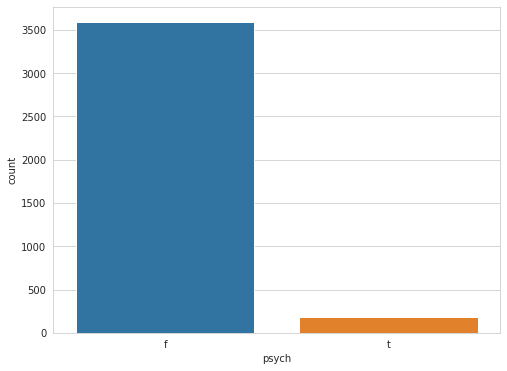

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


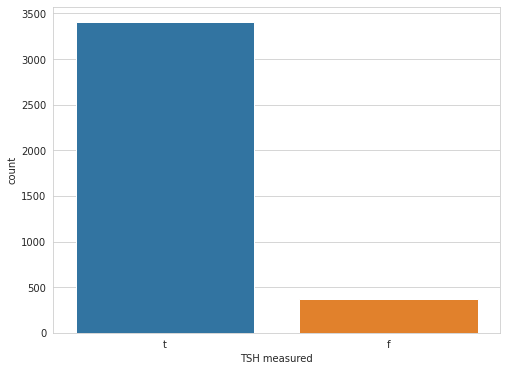

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


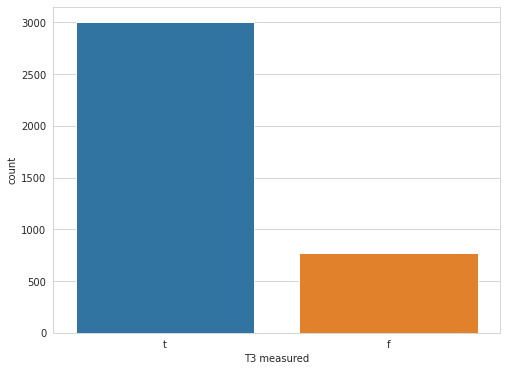

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


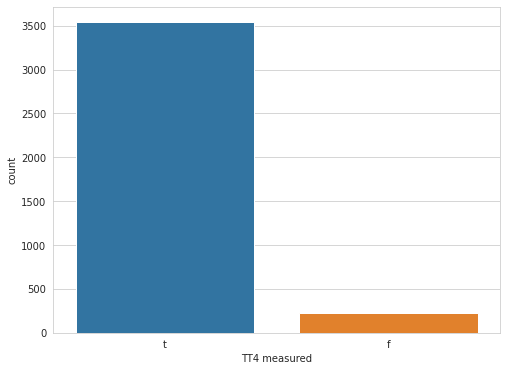

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


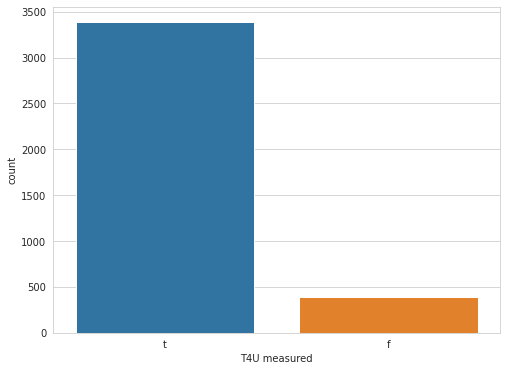

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


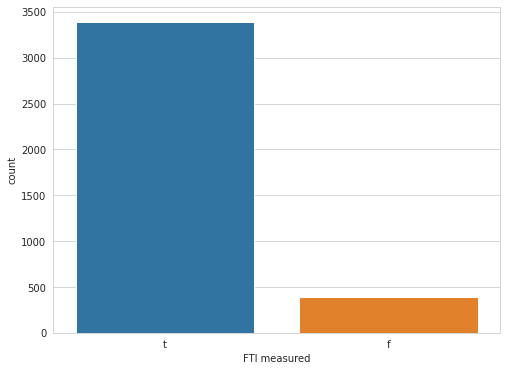

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


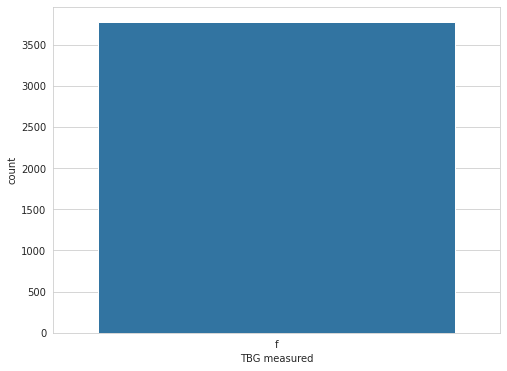

In [19]:
# plotting countplot for each categorical values
for rows in cat:
  plt.figure(figsize =(8,6))
  sns.countplot(data[rows])
  plt.show()

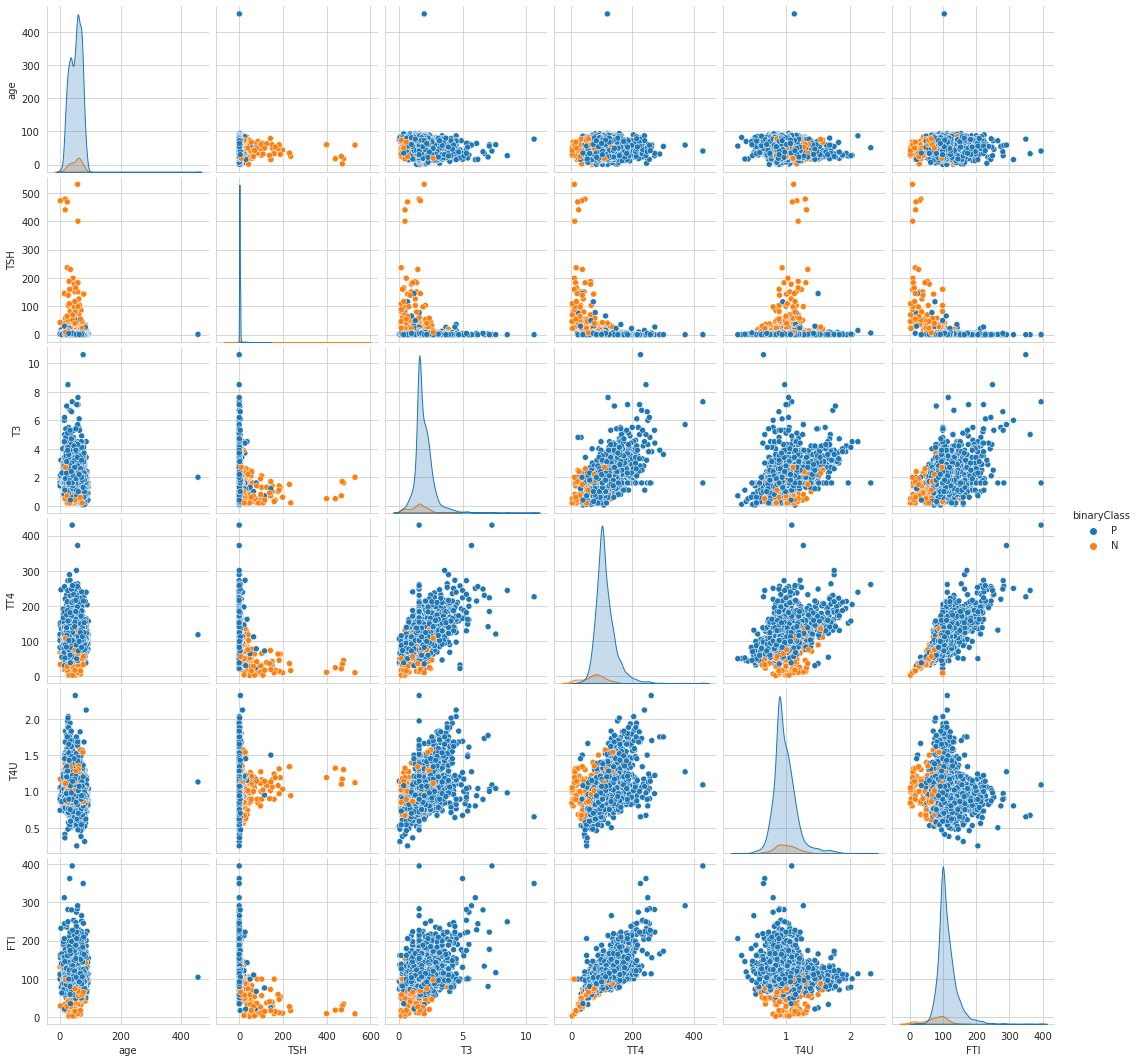

In [20]:
# created a pairplot with target variable as hue
sns.pairplot(data = data, hue = 'binaryClass')

In [21]:
# Replacing alien element with maximum value
data['sex'] = data['sex'].replace('?','F')

In [22]:
# Converting categories to numerical values
for val in cat:
  data[val] = data[val].replace('f',0)
  data[val] = data[val].replace('t',1)
  data[val] = data[val].replace('F',0)
  data[val] = data[val].replace('M',1)
  data[val] = data[val].astype('int64')

In [23]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,0,0,0,0,0,0,0,0,0,...,1,125.0,1,1.140000,1,109.000000,0,?,SVHC,P
1,23.0,0,0,0,0,0,0,0,0,0,...,1,102.0,0,0.892915,0,99.194247,0,?,other,P
2,46.0,1,0,0,0,0,0,0,0,0,...,1,109.0,1,0.910000,1,120.000000,0,?,other,P
3,70.0,0,1,0,0,0,0,0,0,0,...,1,175.0,0,0.892915,0,99.194247,0,?,other,P
4,70.0,0,0,0,0,0,0,0,0,0,...,1,61.0,1,0.870000,1,70.000000,0,?,SVI,P


In [24]:
data['referral source'].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

In [25]:
# converting categories of refferal source column using dictionary
''' other = 1
    SVI = 2
    SVHC = 3
    STMW = 4
    SVHD = 5'''

convert = {'other': 1, 'SVI':  2,'SVHC': 3,'STMW': 4,'SVHD': 5}
data['referral source'] = data['referral source'].replace(convert)
data['referral source'].astype('int64')

0       3
1       1
2       1
3       1
4       2
       ..
3767    1
3768    2
3769    1
3770    2
3771    1
Name: referral source, Length: 3772, dtype: int64

In [26]:
#checking data types of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   int64  
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

Text(0.5, 1.0, 'Correlation Matrix')

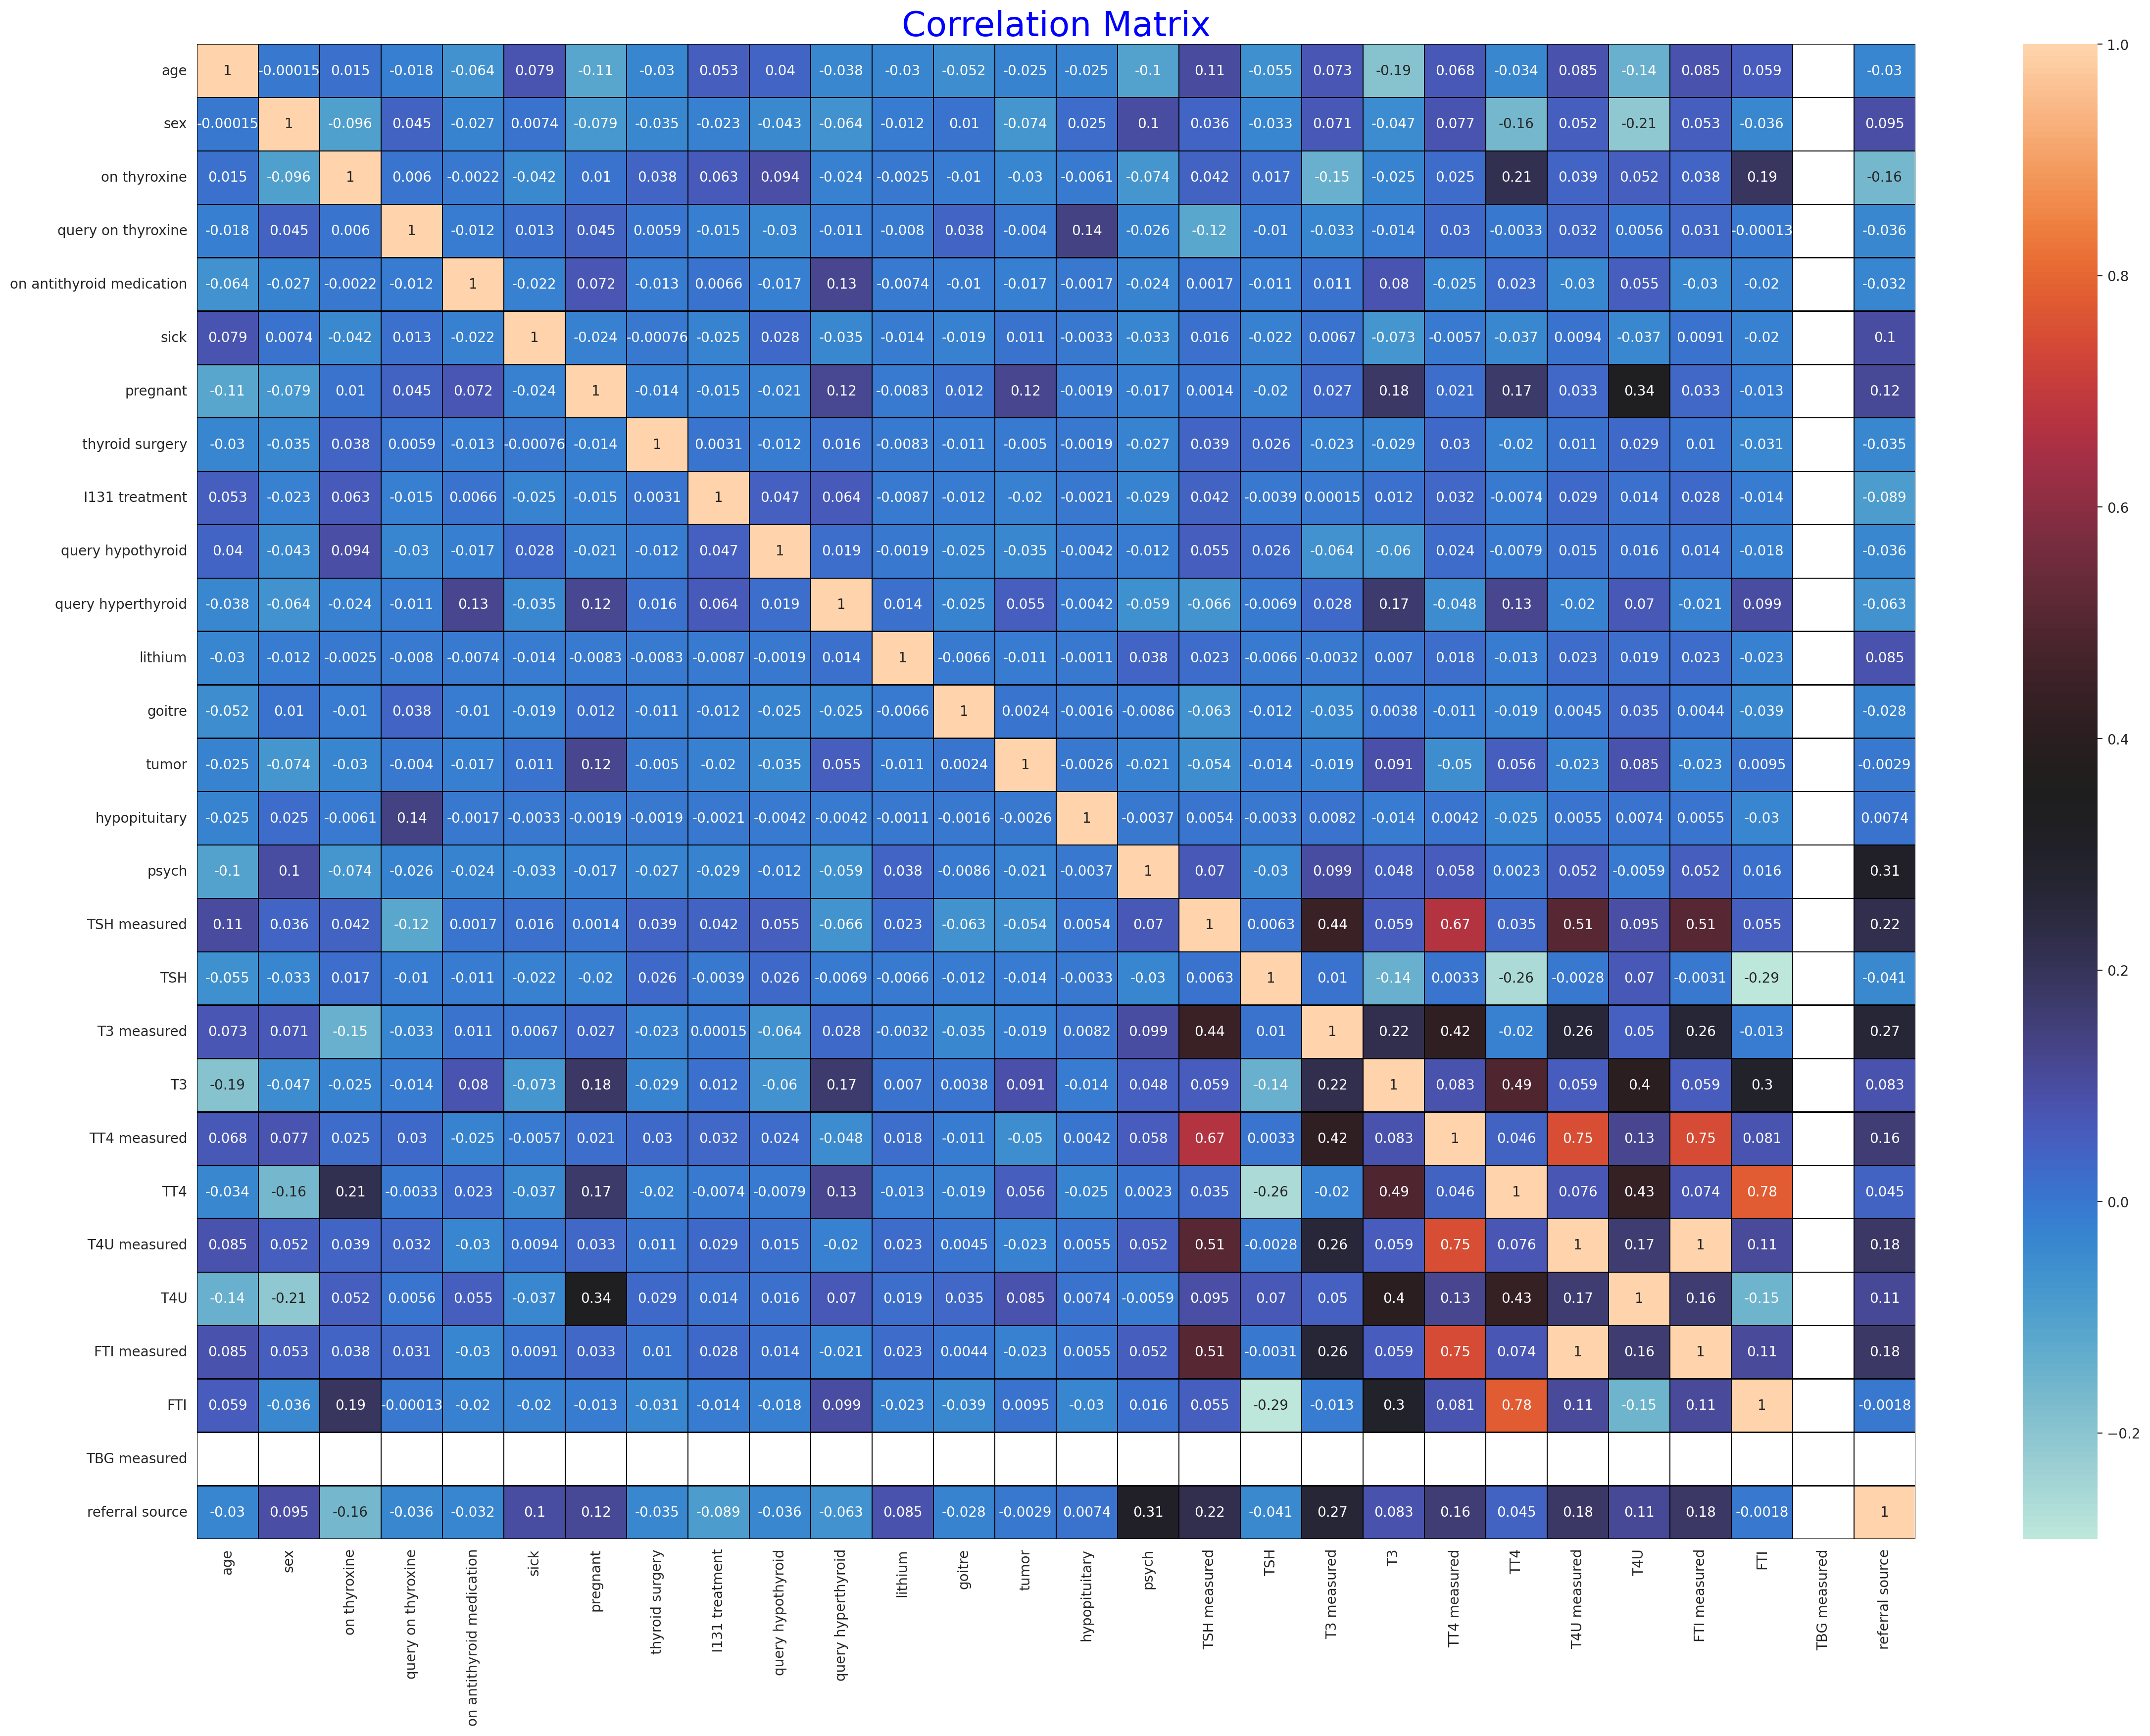

In [27]:
# Checking Correlation
plt.figure(figsize= (28 ,20), dpi= 200)
corr = data.corr()
sns.heatmap(corr, annot = True, cmap = 'icefire', linecolor = 'black', linewidths= 0.5)
plt.title('Correlation Matrix',{'fontsize':25,'color': 'blue'})

# Spliting data

In [28]:
X = data.drop(['TBG','binaryClass'], axis = 1)
y = data['binaryClass']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42529)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2640, 28), (1132, 28), (2640,), (1132,))

# Encoding dependent variable and Scaling

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [32]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [33]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

In [34]:
X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

# Modelling and Score

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
pred = lr.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.35      0.51       102
           1       0.94      1.00      0.97      1030

    accuracy                           0.94      1132
   macro avg       0.94      0.68      0.74      1132
weighted avg       0.94      0.94      0.93      1132



Text(0.5, 1.0, 'Confusion Matrix')

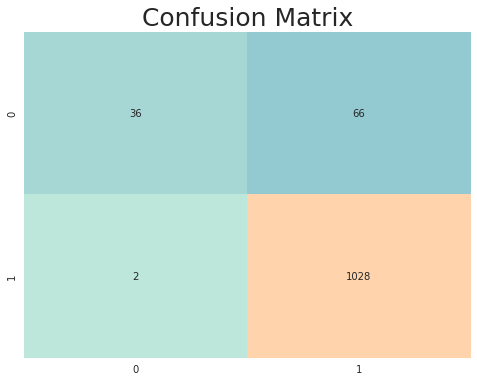

In [38]:
# Ploting Confusion Matrix
plt.figure(figsize= (8,6))
sns.heatmap(cm, cbar = False, annot = True, fmt = 'g', cmap = 'icefire')
plt.title('Confusion Matrix',{'fontsize':25})